## Customizing Figures
This notebook demonstrates how to customize some aspects of your matplotlib figures to optimize them for presentations or publications.

Resources:

   * http://xarray.pydata.org
   * http://matplotlib.org/users/customizing
   * http://matplotlib.org/users/gridspec

First, we'll import a few basic libraries.

`Xarray` is a special library that loads and organizes nefCDF data into easy-to-use python objects. One huge advantage of using `xarray` is lazy loading so you can load and slice your dataset without importing data into memory. We only bring data into memory when we do something to it (e.g., operations, saving new data objects, plotting, etc.).

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

### Making a research plot
Okay, let's make a some research plots that we might want to include in a paper or talk. We'll use nowcast results from the Salish Sea NEMO model (SalishSeaCast) obtainable from our ERDDAP server (https://salishsea.eos.ubc.ca/erddap).

We'll be using `xarray` to manage our data from the loading stage to the plotting stage. This example will work for other netCDF libraries or ASCII data, but you will need different syntax and you might have to do additional processing (e.g., turning datestrings into date objects, etc.).

In [2]:
# Load Salish Sea model results from ERDDAP server
NEMO = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DTracerFields1hV1')
print(NEMO.coords)      # Coordinates of the xarray object
print(NEMO.data_vars)   # Variables in the xarray object
print(NEMO.dims)        # Dimensions

Coordinates:
  * time     (time) datetime64[ns] 2014-09-24T00:30:00 2014-09-24T01:30:00 ...
  * depth    (depth) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 6.50031 ...
  * gridY    (gridY) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * gridX    (gridX) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    salinity     (time, depth, gridY, gridX) float64 ...
    temperature  (time, depth, gridY, gridX) float64 ...
Frozen(SortedKeysDict({'gridX': 398, 'time': 18048, 'depth': 40, 'gridY': 898}))


For our plot, we'll look at the Ocean Networks Canada central and east node locations (http://www.oceannetworks.ca/installations/observatories/venus-salish-sea) for the first half of September 2016. We'll define our ONC locations as a dictionary to make plotting easier. Notice the `xarray`-specific slicing notation.

In [3]:
# Extract ONC location profiles from results object into dict
timeslice = slice('2016 Sep 1 00:00', '2016 Sep 15 00:00')
ONC = {}  # Empty dict
ONC['central'] = NEMO.sel(time=timeslice).isel(gridX=266, gridY=424)  # (266, 424) model grid location for central node
ONC['east'] = NEMO.sel(time=timeslice).isel(gridX=283, gridY=417)     # (283, 417) model grid location for east node

Now we'll make our figure. Multiple timeseries subplots that share a time axis is a common figure format that I use. Since each plot will be roughly the same, we can predefine some attributes of our results objects to reduce harcoding later.

In [4]:
# Predefine attributes as dictionaries
depth = {'central': 294, 'east': 164}  # Bottom depth at each location
ylim = {'salinity': [29.9, 31], 'temperature': [10.2, 12]}  # Ranges we would like to plot
ylabel = {'salinity': 'Salinity [PSU]', 'temperature': 'Temperature [$^\circ$C]'}

Now we can make timeseries subplots using a loop.

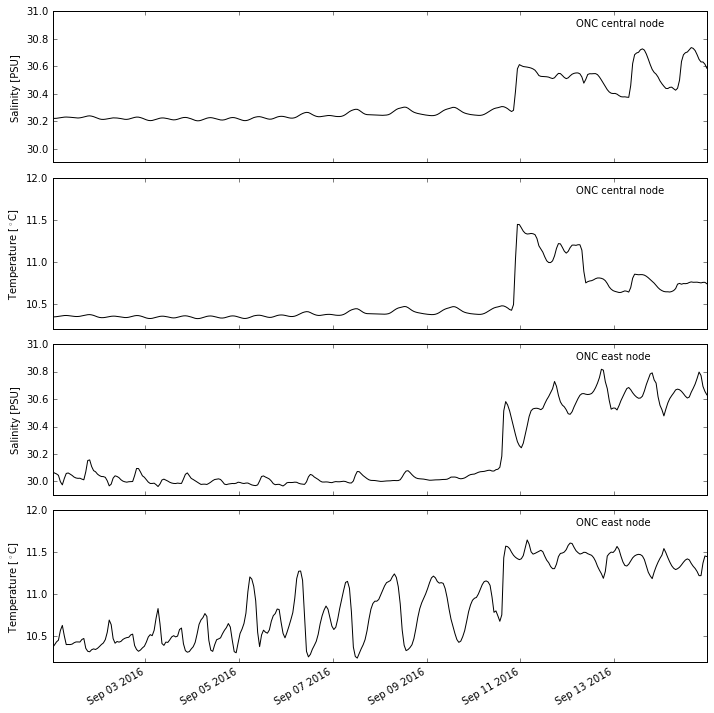

In [5]:
# Define lists that specify which quantities appear in each plot
nodes = ['central', 'central', 'east', 'east']
qtys = ['salinity', 'temperature', 'salinity', 'temperature']

# Make figure window and subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Loop through subplot lists together using zip()
for ax, node, qty in zip(axs, nodes, qtys):
    
    # Generic code for each subplot
    ax.plot(ONC[node]['time'], ONC[node][qty].sel(depth=depth[node], method='nearest'), 'k-')
    ax.set_ylim(ylim[qty])
    ax.set_ylabel(ylabel[qty])
    ax.text(.8, .9, 'ONC {} node'.format(node), transform=ax.transAxes)

# Special function that links timeseries axes to bottom axis
fig.autofmt_xdate()

# Reduce whitespace around figure for saving
fig.tight_layout()

# Save figure
fig.savefig('/home/bmoorema/Desktop/myfig.eps')

### Customizing your figure
Okay, so we've got our figure. It clearly shows some interesting warm, salty intrusions near the ONC nodes in the model around September 10th! Now we want to use it in a talk. The first thing we need to think about is text size. Need to make it bigger.

The `matplotlib rcParams` control plotting features like font size. We can access the `rcParams` several ways; one simple way is to use `plt.rcParams` which is a dictionary.

In [6]:
# Print current font size
print(plt.rcParams['font.size'])

10.0


We can change the font size easily be redefining it.

In [7]:
plt.rcParams['font.size'] = 14.0
print(plt.rcParams['font.size'])

14.0


We have a variety of different controls over text size, so if this result is not satisfactory, we can get a look at all the different `rcParams`. Use `matplotlib_fname()` to find the path to your sample `matplotlibrc` file.

In [8]:
from matplotlib import matplotlib_fname
matplotlib_fname()

'/home/bmoorema/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

The `matplotlibrc` file contains instructions for customizing.

In [9]:
!head -30 /home/bmoorema/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc

### MATPLOTLIBRC FORMAT

# This is a sample matplotlib configuration file - you can find a copy
# of it on your system in
# site-packages/matplotlib/mpl-data/matplotlibrc.  If you edit it
# there, please note that it will be overwritten in your next install.
# If you want to keep a permanent local copy that will not be
# overwritten, place it in the following location:
# unix/linux:
#     $HOME/.config/matplotlib/matplotlibrc or
#     $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
# other platforms:
#     $HOME/.matplotlib/matplotlibrc
#
# See http://matplotlib.org/users/customizing.html#the-matplotlibrc-file for
# more details on the paths which are checked for the configuration file.
#
# This file is best viewed in a editor which supports python mode
# syntax highlighting. Blank lines, or lines starting with a comment
# symbol, are ignored, as are trailing comments.  Other lines must
# have the format
#    key : val # optional comment
#
# Colors: for the color 

Attributes are divided into sections, for instance, FONT.

In [10]:
!head -156 /home/bmoorema/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc | tail -52

### FONT
#
# font properties used by text.Text.  See
# http://matplotlib.org/api/font_manager_api.html for more
# information on font properties.  The 6 font properties used for font
# matching are given below with their default values.
#
# The font.family property has five values: 'serif' (e.g., Times),
# 'sans-serif' (e.g., Helvetica), 'cursive' (e.g., Zapf-Chancery),
# 'fantasy' (e.g., Western), and 'monospace' (e.g., Courier).  Each of
# these font families has a default list of font names in decreasing
# order of priority associated with them.  When text.usetex is False,
# font.family may also be one or more concrete font names.
#
# The font.style property has three values: normal (or roman), italic
# or oblique.  The oblique style will be used for italic, if it is not
# present.
#
# The font.variant property has two values: normal or small-caps.  For
# TrueType fonts, which are scalable fonts, small-caps is equivalent
# to using a font size of 'smaller', or about 83% of the curre

Setting up your own config file is possible, but tricky because the matplotlib inline environment uses different parameters than the regular python environment. I haven't fully figured this out yet, so I just modify my params in the notebook as I need to.

###Publication figures
Journals can have pretty specific requirements for figures. AGU, for instance, has 3 accepted figure sizes:
   
   1. 9.5cm x 11.5cm (1/4 page)
   2. 19cm x 11.5cm (1/2 page)
   3. 19cm x 23cm (full page)

And they require 8 point font.

https://publications.agu.org/author-resource-center/

We can prepare our timeseries plot for publication easily.

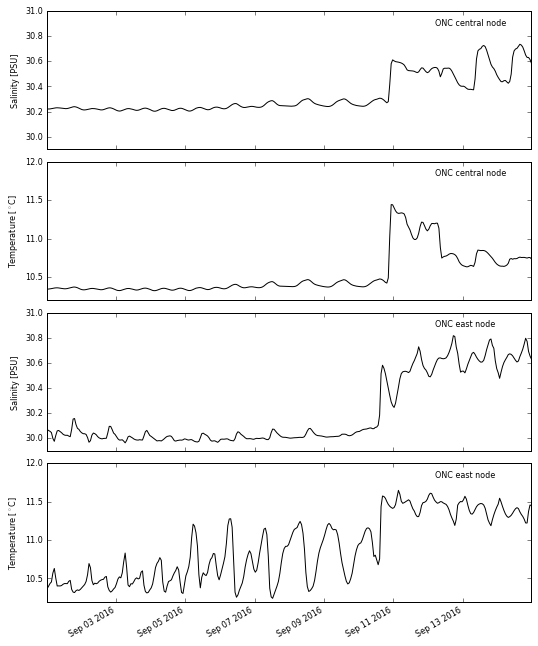

In [11]:
# Font size
plt.rcParams['font.size'] = 8.0

# Figure size
fig, axs = plt.subplots(4, 1, figsize=(7.5, 9)) # 19x23 converted to inches

# Timeseries figure code
# ----------------------
for ax, node, qty in zip(axs, nodes, qtys):
    ax.plot(ONC[node]['time'], ONC[node][qty].sel(depth=depth[node], method='nearest'), 'k-')
    ax.set_ylim(ylim[qty])
    ax.set_ylabel(ylabel[qty])
    ax.text(.8, .9, 'ONC {} node'.format(node), transform=ax.transAxes)
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig('/home/bmoorema/Desktop/myfig_pub.eps')

###Subplots
Since figures=publication_units=money, it's advantageous to try and combine figures as much as possible (without confusing the reader!) In that spirit, say we want to add T and S profiles along side our timeseries plots. `plt.subplots` works okay for this, but we can get a lot more flexibility using matplotlib's `gridspec`.

In [12]:
from matplotlib import gridspec

To set up our subplots, we create a `gridspec` object that can be sliced just like an array.

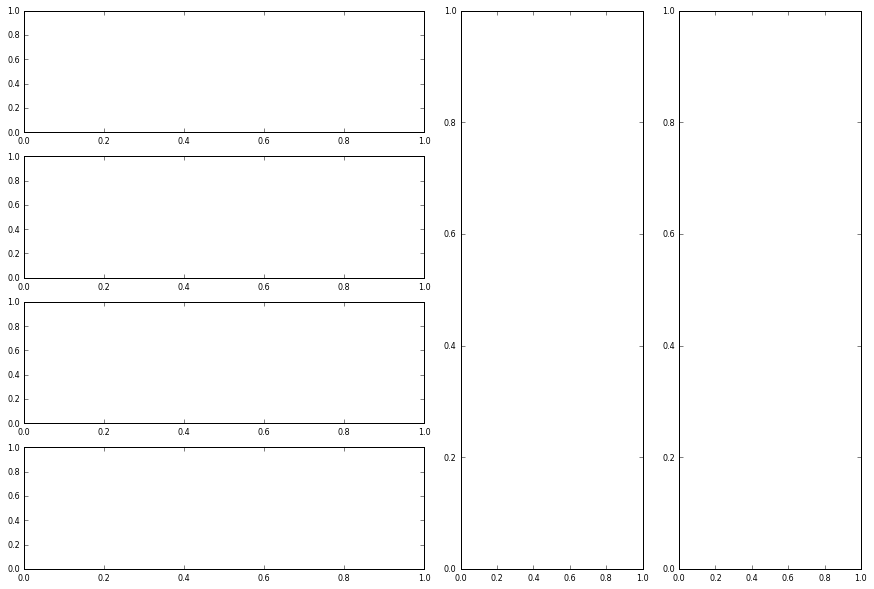

In [13]:
# Make figure
fig = plt.figure(figsize=(15, 10))

# Define gridspec object (4 rows for timeseries, timeseries span 2 columns, profiles in cols 3 and 4)
gs = gridspec.GridSpec(4, 4)

# Populate the rows of the first 2 columns with our timeseries
tss = [plt.subplot(gs[ax, :2]) for ax in range(4)]

# Populate last 2 columns with profiles
pfs = [plt.subplot(gs[:, 2:3]), plt.subplot(gs[:, 3:])]

Now add code for timeseries and profile plots.

(This is just a quick example. `gridspec` has a lot more customization options.)

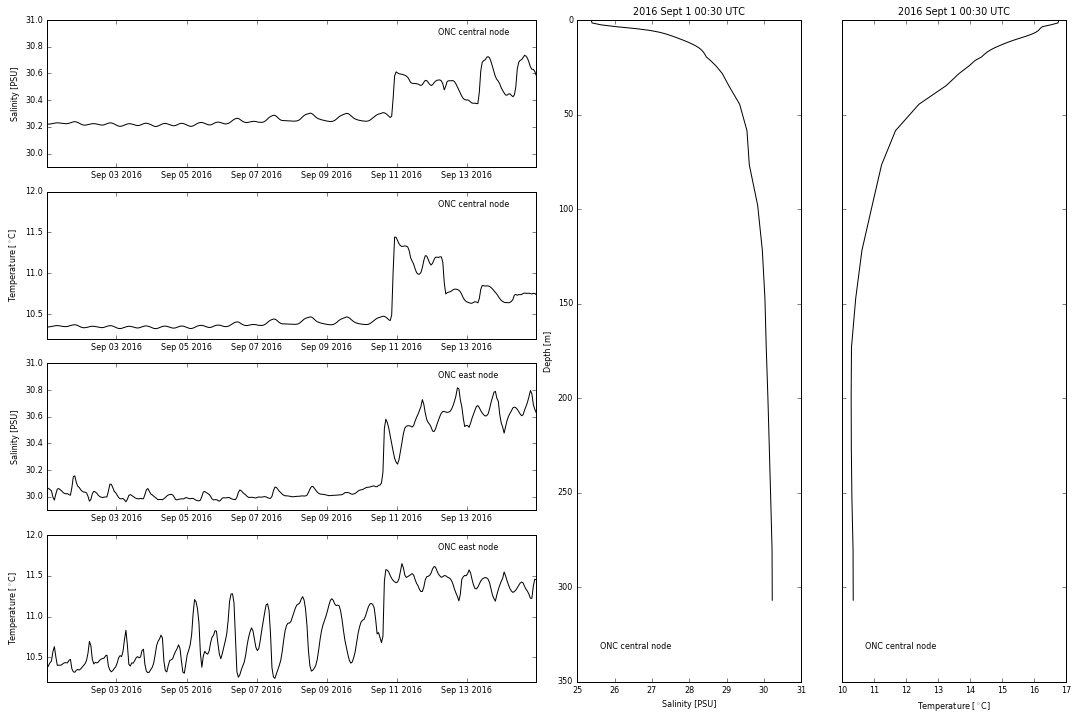

In [14]:
# Code from above
# --------------------------------------
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
tss = [plt.subplot(gs[ax, :2]) for ax in range(4)]
pfs = [plt.subplot(gs[:, 2:3]), plt.subplot(gs[:, 3:])]
# --------------------------------------

# Timeseries plots
nodes = ['central', 'central', 'east', 'east']
qtys = ['salinity', 'temperature', 'salinity', 'temperature']
for ts, node, qty in zip(tss, nodes, qtys):
    ts.plot(ONC[node]['time'], ONC[node][qty].sel(depth=depth[node], method='nearest'), 'k-')
    ts.set_ylim(ylim[qty])
    ts.set_ylabel(ylabel[qty])
    ts.text(.8, .9, 'ONC {} node'.format(node), transform=ts.transAxes)

# Profiles
time = '2016 Sept 1 00:30 UTC'
nodes = ['central', 'central']
qtys = ['salinity', 'temperature']
for pf, node, qty in zip(pfs, nodes, qtys):
    pf.plot(np.ma.masked_values(ONC[node][qty].sel(time=time), 0), ONC[node]['depth'], 'k-')
    pf.invert_yaxis()
    pf.set_xlabel(ylabel[qty])
    pf.set_title(time)
    pf.text(.1, .05, 'ONC {} node'.format(node), transform=pf.transAxes)

# Link profile depth axes
pfs[0].set_ylabel('Depth [m]')
pfs[1].set_yticklabels('')

# Tight layout and save
fig.tight_layout()
fig.savefig('/home/bmoorema/Desktop/myfig_subplots.eps')